<a href="https://colab.research.google.com/github/ankitbit/Deep_Learning/blob/master/Assignment%20Reports/Assignment%204/High_Performance_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3119578976808555796
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 5396075241770923396
physical_device_desc: "device: XLA_CPU device"
]


Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
0.03
0.02
0.001
0.0001
0.01


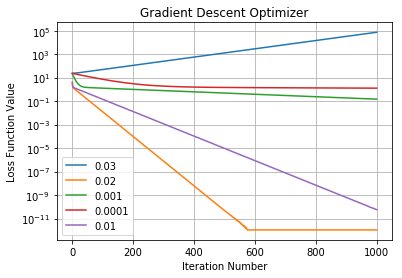

In [0]:
# Exercise N.1
import numpy as N
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
import tensorflow as tf
import matplotlib.pyplot as plt

cpu_set = '/cpu:0'

# Exercise 1: 
# –
# Try 
# GradientDescentOptimizer with different steps
# –
# Check out other descent methods (look for options online)
# –

#     GradientDescentOptimizer
#     AdagradOptimizer
#     MomentumOptimizer
#     AdamOptimizer



# Represent these extra experiments plus the Gradient Descent with 
# 0.01 step

# GradientDescentOptimizer

# x = tf.placeholder(tf.float32, shape=[None, 784])
# y_ = tf.placeholder(tf.float32, shape=[None, 10])
W = tf.Variable([.3],dtype = tf.float32)
b = tf.Variable([-.3],dtype = tf.float32)
x = tf.placeholder(tf.float32)
linear_model = W*x + b
y = tf.placeholder(tf.float32)

#loss
loss = tf.reduce_sum(tf.square(linear_model - y))
# optimizer

with tf.device(cpu_set):

    for l_r in [0.03, 0.02, 0.001, 0.0001,0.01]:

        print(l_r)
        optimizer = tf.train.GradientDescentOptimizer(l_r)
        train = optimizer.minimize(loss)

        #training data
        x_train = [1,2,3,4]
        y_train = [0, -1,-2,-3]

        #training loop

        init = tf.global_variables_initializer()
        sess = tf.Session()
        sess.run(init)
        curr_W, curr_b, curr_loss = sess.run([W,b,loss],{x:x_train,y:y_train})
    #     print('W:%s b: %s loss: %s'%(curr_W,curr_b,curr_loss))

        curr_loss_lst = []
        steps = N.linspace(1,1000,1000)
        steps = list(steps)

        for i in range(1000):
            sess.run(train,{x:x_train,y:y_train})
            curr_W, curr_b, curr_loss = sess.run([W,b,loss],{x:x_train,y:y_train})
    #         print('W:%s b: %s loss: %s'%(curr_W,curr_b,curr_loss))
            curr_loss_lst.append(curr_loss)

    # pylab.plot(x, y1, '-b', label='sine')
    # pylab.plot(x, y2, '-r', label='cosine')
    # pylab.legend(loc='upper left')   
        plt.plot(steps,curr_loss_lst,label= str(l_r))
        plt.yscale('log')
        plt.grid(True)
        plt.xlabel('Iteration Number')
        plt.ylabel('Loss Function Value')
        plt.legend(loc='lower left')
        plt.title('Gradient Descent Optimizer')

    plt.show()

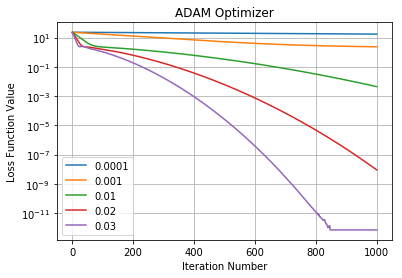

In [0]:
# ADAM Optimizer

W = tf.Variable([.3],dtype = tf.float32)
b = tf.Variable([-.3],dtype = tf.float32)
x = tf.placeholder(tf.float32)
linear_model = W*x + b
y = tf.placeholder(tf.float32)

#loss
loss = tf.reduce_sum(tf.square(linear_model - y))
# optimizer

with tf.device(cpu_set):

    for l_r in [0.0001,0.001,0.01,0.02,0.03]:

        optimizer = tf.train.AdamOptimizer(l_r)
        train = optimizer.minimize(loss)

        #training data
        x_train = [1,2,3,4]
        y_train = [0, -1,-2,-3]

        #training loop

        init = tf.global_variables_initializer()
        sess = tf.Session()
        sess.run(init)
        curr_W, curr_b, curr_loss = sess.run([W,b,loss],{x:x_train,y:y_train})
        # print('W:%s b: %s loss: %s'%(curr_W,curr_b,curr_loss))

        curr_loss_lst2 = []
        steps = N.linspace(1,1000,1000)
        steps = list(steps)

        for i in range(1000):
            sess.run(train,{x:x_train,y:y_train})
            curr_W, curr_b, curr_loss = sess.run([W,b,loss],{x:x_train,y:y_train})
        #     print('W:%s b: %s loss: %s'%(curr_W,curr_b,curr_loss))
            curr_loss_lst2.append(curr_loss)




        plt.plot(steps,curr_loss_lst2,label= str(l_r))
        plt.yscale('log')
        plt.grid(True)
        plt.xlabel('Iteration Number')
        plt.ylabel('Loss Function Value')
        plt.legend(loc='lower left')
        plt.title('ADAM Optimizer')

    plt.show()

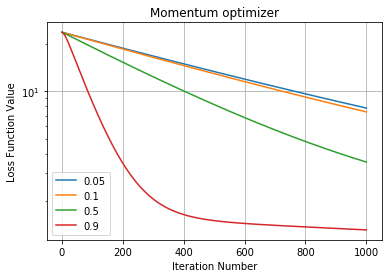

In [0]:
# Momentum Optimizer

W = tf.Variable([.3],dtype = tf.float32)
b = tf.Variable([-.3],dtype = tf.float32)
x = tf.placeholder(tf.float32)
linear_model = W*x + b
y = tf.placeholder(tf.float32)

#loss
loss = tf.reduce_sum(tf.square(linear_model - y))


# optimizer


decay_rate = 0.00005
starter_learning_rate = 0.000009
init_momentum = 0.9
global_step = tf.Variable(0, trainable=False)
learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,10000, decay_rate, staircase=True)

with tf.device(cpu_set):
    for mom in [0.05, 0.1, 0.5, 0.9]:

        optimizer = tf.train.MomentumOptimizer(learning_rate,mom)
        train = optimizer.minimize(loss)

        #training data
        x_train = [1,2,3,4]
        y_train = [0, -1,-2,-3]

        #training loop

        init = tf.global_variables_initializer()
        sess = tf.Session()
        sess.run(init)
        curr_W, curr_b, curr_loss = sess.run([W,b,loss],{x:x_train,y:y_train})
        # print('W:%s b: %s loss: %s'%(curr_W,curr_b,curr_loss))

        curr_loss_lst3 = []
        steps = N.linspace(1,1000,1000)
        steps = list(steps)

        for i in range(1000):
            sess.run(train,{x:x_train,y:y_train})
            curr_W, curr_b, curr_loss = sess.run([W,b,loss],{x:x_train,y:y_train})
        #     print('W:%s b: %s loss: %s'%(curr_W,curr_b,curr_loss))
            curr_loss_lst3.append(curr_loss)

        # plt.plot(steps,curr_loss_lst, label = 'Momentum Optimizer')
        # plt.yscale('log')
        # plt.grid(True)
        # plt.xlabel('Iteration Number')
        # plt.ylabel('Loss Function Value')

        plt.plot(steps,curr_loss_lst3,label= str(mom))
        plt.yscale('log')
        plt.grid(True)
        plt.xlabel('Iteration Number')
        plt.ylabel('Loss Function Value')
        plt.legend(loc='lower left')
        plt.title('Momentum optimizer')
    plt.show()

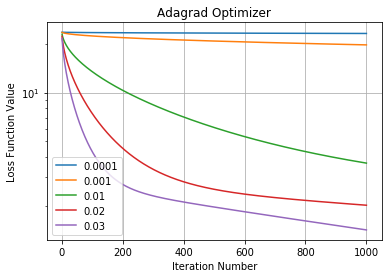

In [0]:
# AdagradOptimizer

W = tf.Variable([.3],dtype = tf.float32)
b = tf.Variable([-.3],dtype = tf.float32)
x = tf.placeholder(tf.float32)
linear_model = W*x + b
y = tf.placeholder(tf.float32)

#loss
loss = tf.reduce_sum(tf.square(linear_model - y))
# optimizer

with tf.device(cpu_set):

    for l_r in [0.0001,0.001,0.01,0.02,0.03]:

        optimizer = tf.train.AdagradOptimizer(l_r,0.1)
        train = optimizer.minimize(loss)

        #training data
        x_train = [1,2,3,4]
        y_train = [0, -1,-2,-3]

        #training loop

        init = tf.global_variables_initializer()
        sess = tf.Session()
        sess.run(init)
        curr_W, curr_b, curr_loss = sess.run([W,b,loss],{x:x_train,y:y_train})
        # print('W:%s b: %s loss: %s'%(curr_W,curr_b,curr_loss))

        curr_loss_lst4 = []
        steps = N.linspace(1,1000,1000)
        steps = list(steps)

        for i in range(1000):
            sess.run(train,{x:x_train,y:y_train})
            curr_W, curr_b, curr_loss = sess.run([W,b,loss],{x:x_train,y:y_train})
        #     print('W:%s b: %s loss: %s'%(curr_W,curr_b,curr_loss))
            curr_loss_lst4.append(curr_loss)

        plt.plot(steps,curr_loss_lst4,label= str(l_r))
        plt.yscale('log')
        plt.grid(True)
        plt.xlabel('Iteration Number')
        plt.ylabel('Loss Function Value')
        plt.legend(loc='lower left')
        plt.title('Adagrad Optimizer')
    plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

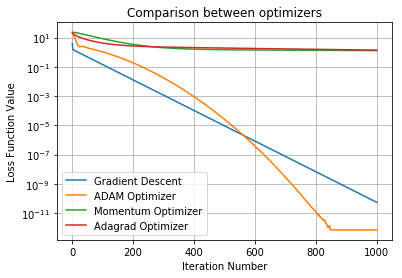

In [0]:
plt.plot(steps,curr_loss_lst, label = 'Gradient Descent')
plt.yscale('log')
plt.grid(True)
plt.xlabel('Iteration Number')
plt.ylabel('Loss Function Value')
plt.legend(loc='lower left')

plt.plot(steps,curr_loss_lst2, label = 'ADAM Optimizer')
plt.yscale('log')
plt.grid(True)
plt.xlabel('Iteration Number')
plt.ylabel('Loss Function Value')
plt.legend(loc='lower left')

plt.plot(steps,curr_loss_lst3,label = 'Momentum Optimizer')
plt.yscale('log')
plt.grid(True)
plt.xlabel('Iteration Number')
plt.ylabel('Loss Function Value')
plt.legend(loc='lower left')

plt.plot(steps,curr_loss_lst4,label = 'Adagrad Optimizer')
plt.yscale('log')
plt.grid(True)
plt.xlabel('Iteration Number')
plt.ylabel('Loss Function Value')
plt.legend(loc='lower left')
plt.title('Comparison between optimizers')

plt.show

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1662: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Training
test accuracy 0.9036
Training
test accuracy 0.8534
Training
test accuracy 0.918


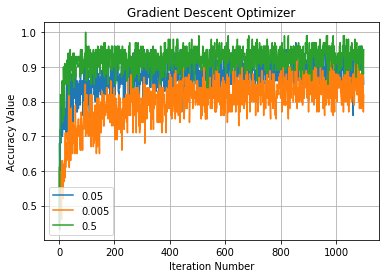

In [0]:
# Exercise 2

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
import numpy as N
import tensorflow as tf
data = mnist.train.images



n_train = data.shape[0]
batch_n = 100 
epochs = 2
iterations = int(n_train/batch_n)*epochs


x = tf.placeholder(tf.float32,[None,784])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x,W)+b)
y_ = tf.placeholder(tf.float32,[None,10])

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y),reduction_indices = [1]))

with tf.device(cpu_set):

    for l_r in [0.05, 0.005, 0.5]:

        train_step = tf.train.GradientDescentOptimizer(l_r).minimize(cross_entropy)
        correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        sess = tf.InteractiveSession()

        # tf.global_variables_initializer().run()
        init = tf.global_variables_initializer()
        sess.run(init)

        # TRAINING PHASE
        print('Training')
        steps = N.linspace(1,iterations,iterations)
        steps = list(steps)
        acc_lst = []

        for i in range(iterations):
            batch = mnist.train.next_batch(batch_n)
            batch_xs = batch[0]
            batch_ys = batch[1]
            sess.run(train_step,feed_dict = {x:batch_xs,y_:batch_ys})
            train_accuracy = accuracy.eval(feed_dict={x: batch_xs, y_: batch_ys})
    #         print('step %d, training accuracy %g' % (i, train_accuracy))
            acc_lst.append(train_accuracy)
        correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
        print('test accuracy %g' % accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

        plt.plot(steps,acc_lst,label= str(l_r))
        plt.grid(True)
        plt.xlabel('Iteration Number')
        plt.ylabel('Accuracy Value')
        plt.legend(loc='lower left')
        plt.title('Gradient Descent Optimizer')

    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1662: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Training
test accuracy 0.856
Training
test accuracy 0.9136
Training
test accuracy 0.9163
Training
test accuracy 0.9177
Training
test accuracy 0.098


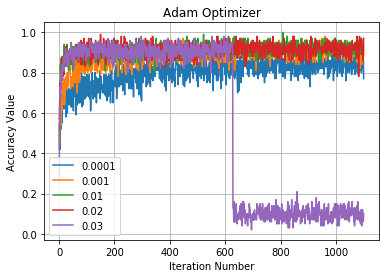

In [0]:
# With AdamOptimizer

n_train = data.shape[0]
batch_n = 100 
epochs = 2
iterations = int(n_train/batch_n)*epochs


x = tf.placeholder(tf.float32,[None,784])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x,W)+b)
y_ = tf.placeholder(tf.float32,[None,10])

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y),reduction_indices = [1]))

with tf.device(cpu_set):

    for l_r in [0.0001,0.001,0.01,0.02,0.03]:


        train_step = tf.train.AdamOptimizer(l_r).minimize(cross_entropy)
        correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        sess = tf.InteractiveSession()

        # tf.global_variables_initializer().run()
        init = tf.global_variables_initializer()
        sess.run(init)

        # TRAINING PHASE
        print('Training')
        steps = N.linspace(1,iterations,iterations)
        steps = list(steps)
        acc_lst = []

        for i in range(iterations):
            batch = mnist.train.next_batch(batch_n)
            batch_xs = batch[0]
            batch_ys = batch[1]
            sess.run(train_step,feed_dict = {x:batch_xs,y_:batch_ys})
            train_accuracy = accuracy.eval(feed_dict={x: batch_xs, y_: batch_ys})
    #         print('step %d, training accuracy %g' % (i, train_accuracy))
            acc_lst.append(train_accuracy)
        correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
        print('test accuracy %g' % accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

        plt.plot(steps,acc_lst,label= str(l_r))
        plt.grid(True)
        plt.xlabel('Iteration Number')
        plt.ylabel('Accuracy Value')
        plt.legend(loc='lower left')
        plt.title('Adam Optimizer')

    plt.show()

In [0]:
# Exercise 3 

n_train = data.shape[0]
batch_n = 100 
epochs = 10
iterations = int(n_train/batch_n)*epochs

x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

with tf.device(cpu_set):
    W_conv1 = weight_variable([5, 5, 1, 32])
    b_conv1 = bias_variable([32])
    x_image = tf.reshape(x, [-1, 28, 28, 1])
    h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
    h_pool1 = max_pool_2x2(h_conv1)

    W_conv2 = weight_variable([5, 5, 32, 64])
    b_conv2 = bias_variable([64])

    h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
    h_pool2 = max_pool_2x2(h_conv2)

    W_fc1 = weight_variable([7 * 7 * 64, 1024])
    b_fc1 = bias_variable([1024])

    h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

    keep_prob = tf.placeholder(tf.float32)
    h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

    W_fc2 = weight_variable([1024, 10])
    b_fc2 = bias_variable([10])

    y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
    train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
    correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    with tf.Session(config=tf.ConfigProto(allow_soft_placement=True, log_device_placement=True)) as sess:
#     sess.run(tf.global_variables_initializer())
        init = tf.global_variables_initializer()
        sess.run(init)
        for i in range(iterations):
            batch = mnist.train.next_batch(batch_n)
            if i % 100 == 0:
                train_accuracy = accuracy.eval(feed_dict={x: batch[0], y_: batch[1], keep_prob: 1.0})
                print('step %d, training accuracy %g' % (i, train_accuracy))
            train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

        print('test accuracy %g' % accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

step 0, training accuracy 0.07
step 100, training accuracy 0.84
step 200, training accuracy 0.91
step 300, training accuracy 0.95
step 400, training accuracy 0.97
step 500, training accuracy 0.93
step 600, training accuracy 0.93
step 700, training accuracy 0.94
step 800, training accuracy 0.96
step 900, training accuracy 0.96
step 1000, training accuracy 0.97
step 1100, training accuracy 0.99
step 1200, training accuracy 0.97
step 1300, training accuracy 0.95
step 1400, training accuracy 0.99
step 1500, training accuracy 0.99
step 1600, training accuracy 0.97
step 1700, training accuracy 0.98
step 1800, training accuracy 0.99
step 1900, training accuracy 0.97
step 2000, training accuracy 0.97
step 2100, training accuracy 0.98
step 2200, training accuracy 1
step 2300, training accuracy 1
step 2400, 

In [0]:
# # Exercise 3

# x = tf.placeholder(tf.float32,[None,784])
# W = tf.Variable(tf.zeros([784,10]))
# # b = tf.Variable(tf.zeros([10]))
# # y = tf.nn.softmax(tf.matmul(x,W)+b)
# y_ = tf.placeholder(tf.float32,[None,10])

# def weight_variable(shape):
#     initial = tf.truncated_normal(shape, stddev=0.1)
#     return tf.Variable(initial)

# def bias_variable(shape):
#     initial = tf.constant(0.1, shape=shape)
#     return tf.Variable(initial)

# def conv2d(x, W):
#     return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

# def max_pool_2x2(x):
#     return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
#                         strides=[1, 2, 2, 1], padding='SAME')


# W_conv1 = weight_variable([5, 5, 1, 32])
# b_conv1 = bias_variable([32])
# x_image = tf.reshape(x, [-1, 28, 28, 1])
# h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
# h_pool1 = max_pool_2x2(h_conv1)

# W_conv2 = weight_variable([5, 5, 32, 64])
# b_conv2 = bias_variable([64])

# h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
# h_pool2 = max_pool_2x2(h_conv2)

# W_fc1 = weight_variable([7 * 7 * 64, 1024])
# b_fc1 = bias_variable([1024])

# h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
# h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

# keep_prob = tf.placeholder(tf.float32)
# h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# W_fc2 = weight_variable([1024, 10])
# b_fc2 = bias_variable([10])

# y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

# cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
# train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
# correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
# accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer())
#     print('TRAINING')
#     for i in range(1100):
#         batch_ini = 50*i
#         batch_end = 50*i+50
#         batch_xs = data[batch_ini:batch_end,:]
#         batch_ys = real_output[batch_ini:batch_end,:]
#         if i%1 == 0:
#             train_accuracy = accuracy.eval(feed_dict={
#             x: batch_xs, y_: batch_ys, keep_prob: 1.0})
#             print('step %d, training accuracy %g' % (i, train_accuracy))
#             train_step.run(feed_dict={x: batch_xs, y_: batch_ys, keep_prob: 0.5})    
#     print('test accuracy %g' % accuracy.eval(feed_dict={ x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))


TRAINING
step 0, training accuracy 0.12
step 1, training accuracy 0.08
step 2, training accuracy 0.08
step 3, training accuracy 0.12
step 4, training accuracy 0.24
step 5, training accuracy 0.2
step 6, training accuracy 0.2
step 7, training accuracy 0.2
step 8, training accuracy 0.18
step 9, training accuracy 0.24
step 10, training accuracy 0.34
step 11, training accuracy 0.28
step 12, training accuracy 0.3
step 13, training accuracy 0.38
step 14, training accuracy 0.42
step 15, training accuracy 0.36
step 16, training accuracy 0.5
step 17, training accuracy 0.44
step 18, training accuracy 0.42
step 19, training accuracy 0.52
step 20, training accuracy 0.5
step 21, training accuracy 0.48
step 22, training accuracy 0.58
step 23, training accuracy 0.52
step 24, training accuracy 0.54
step 25, training accuracy 0.64
step 26, training accuracy 0.54
step 27, training accuracy 0.5
step 28, training accuracy 0.6
step 29, training accuracy 0.64
step 30, training accuracy 0.62
step 31, training

step 252, training accuracy 0.94
step 253, training accuracy 0.94
step 254, training accuracy 0.92
step 255, training accuracy 0.92
step 256, training accuracy 0.88
step 257, training accuracy 0.96
step 258, training accuracy 0.94
step 259, training accuracy 0.96
step 260, training accuracy 0.92
step 261, training accuracy 0.92
step 262, training accuracy 0.94
step 263, training accuracy 0.98
step 264, training accuracy 0.92
step 265, training accuracy 0.92
step 266, training accuracy 0.92
step 267, training accuracy 0.96
step 268, training accuracy 0.94
step 269, training accuracy 0.9
step 270, training accuracy 0.96
step 271, training accuracy 0.94
step 272, training accuracy 0.96
step 273, training accuracy 0.92
step 274, training accuracy 0.9
step 275, training accuracy 0.96
step 276, training accuracy 0.92
step 277, training accuracy 1
step 278, training accuracy 0.98
step 279, training accuracy 0.94
step 280, training accuracy 0.92
step 281, training accuracy 0.94
step 282, train

step 505, training accuracy 0.98
step 506, training accuracy 0.96
step 507, training accuracy 0.96
step 508, training accuracy 0.96
step 509, training accuracy 0.9
step 510, training accuracy 0.96
step 511, training accuracy 0.96
step 512, training accuracy 0.92
step 513, training accuracy 0.94
step 514, training accuracy 0.96
step 515, training accuracy 0.94
step 516, training accuracy 0.86
step 517, training accuracy 0.92
step 518, training accuracy 0.92
step 519, training accuracy 0.92
step 520, training accuracy 0.96
step 521, training accuracy 0.94
step 522, training accuracy 0.94
step 523, training accuracy 0.9
step 524, training accuracy 0.96
step 525, training accuracy 0.92
step 526, training accuracy 0.82
step 527, training accuracy 0.94
step 528, training accuracy 0.9
step 529, training accuracy 0.96
step 530, training accuracy 0.96
step 531, training accuracy 0.94
step 532, training accuracy 0.96
step 533, training accuracy 0.84
step 534, training accuracy 0.82
step 535, tra

step 757, training accuracy 0.92
step 758, training accuracy 0.9
step 759, training accuracy 0.9
step 760, training accuracy 0.92
step 761, training accuracy 0.96
step 762, training accuracy 0.98
step 763, training accuracy 0.98
step 764, training accuracy 0.92
step 765, training accuracy 1
step 766, training accuracy 1
step 767, training accuracy 1
step 768, training accuracy 0.98
step 769, training accuracy 0.96
step 770, training accuracy 1
step 771, training accuracy 0.96
step 772, training accuracy 0.94
step 773, training accuracy 0.96
step 774, training accuracy 0.96
step 775, training accuracy 0.96
step 776, training accuracy 0.92
step 777, training accuracy 0.94
step 778, training accuracy 0.98
step 779, training accuracy 0.92
step 780, training accuracy 0.98
step 781, training accuracy 0.94
step 782, training accuracy 0.94
step 783, training accuracy 0.96
step 784, training accuracy 0.94
step 785, training accuracy 0.96
step 786, training accuracy 0.94
step 787, training accur

step 1009, training accuracy 1
step 1010, training accuracy 0.94
step 1011, training accuracy 1
step 1012, training accuracy 0.96
step 1013, training accuracy 1
step 1014, training accuracy 0.96
step 1015, training accuracy 0.98
step 1016, training accuracy 0.96
step 1017, training accuracy 0.94
step 1018, training accuracy 0.96
step 1019, training accuracy 1
step 1020, training accuracy 0.98
step 1021, training accuracy 0.96
step 1022, training accuracy 1
step 1023, training accuracy 1
step 1024, training accuracy 0.94
step 1025, training accuracy 0.96
step 1026, training accuracy 1
step 1027, training accuracy 0.98
step 1028, training accuracy 1
step 1029, training accuracy 0.92
step 1030, training accuracy 0.98
step 1031, training accuracy 0.96
step 1032, training accuracy 0.96
step 1033, training accuracy 0.96
step 1034, training accuracy 1
step 1035, training accuracy 1
step 1036, training accuracy 0.94
step 1037, training accuracy 0.98
step 1038, training accuracy 0.98
step 1039,

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
step 0, training accuracy 0.04
step 100, training accuracy 0.94
step 200, training accuracy 0.98
step 300, training accuracy 0.98
step 400, training accuracy 0.98
step 500, training accuracy 1
step 600, training accuracy 1
step 700, training accuracy 1
step 800, training accuracy 1
step 900, training accuracy 1
step 1000, training accuracy 1
step 1100, training accuracy 1
step 1200, training accuracy 1
step 1300, training accuracy 1
step 1400, training accuracy 1
step 1500, training accuracy 1
step 1600, training accuracy 1
step 1700, training accuracy 1
step 1800, training accuracy 1
step 1900, training accuracy 1
step 2000, training accuracy 1
test accuracy 0.9735
